# UTS

Lakukan analisa terhadap data pada https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra dengan menggunakan klasifikasi
- metode Naive Bayes Classifier
- metode pohon keputusan (Desision Tree)

## UTS Naive Bayes

Naïve Bayes Classifier merupakan sebuah metoda klasifikasi yang berakar pada teorema Bayes . Metode pengklasifikasian dg menggunakan metode probabilitas dan statistik

In [1]:
# Naive Bayes Classification

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [2]:
data = "https://raw.githubusercontent.com/febyfadlilah/dataset/main/Breast%2BCancer%2BCoimbra.csv"
datauts = pd.read_csv(data)

In [3]:
#looking at the first 5 values of the datauts
datauts.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [4]:
#periksa jumlah baris dan kolom dalam dataset
datauts.shape

(116, 10)

In [5]:
#Pilih data menjadi variabel independen 'X' dan variabel 'y'
X = datauts.iloc[:,:9].values 
y = datauts['Classification'].values


In [6]:
# Memisahkan datauts ke dalam set Pelatihan dan set Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [7]:
# Fitur Scaling untuk membawa variabel dalam satu skala
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Memasang Klasifikasi Naive Bayes ke set train dengan kernel linier
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [9]:
# Memprediksi hasil set Tes
y_pred = nvclassifier.predict(X_test)
print(y_pred)

[1 2 1 1 2 2 2 2 1 1 2 1 2 1 1 1 1 1 1 1 2 2 1 2]


In [10]:
# nilai aktual dan prediksi
y_compare = np.vstack((y_test,y_pred)).T
#nilai aktual di sisi kiri dan nilai prediksi di sisi kanan
#mencetak 10 nilai teratas
y_compare[:10,:]

array([[1, 1],
       [2, 2],
       [2, 1],
       [1, 1],
       [1, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 1],
       [2, 1]])

In [11]:
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7 4]
 [7 6]]


In [12]:
#Mencetak akurasi dengan confusion matrix
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))    

Correct predictions:  13
False predictions 11


Accuracy of the Naive Bayes Clasification is:  0.5416666666666666


## UTS Dessicion Tree

Decision tree adalah algoritma machine learning yang menggunakan seperangkat aturan untuk membuat keputusan dengan struktur seperti pohon.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# import numba
# import cv2 as cv

In [14]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [15]:
data_uts = "https://raw.githubusercontent.com/febyfadlilah/dataset/main/Breast%2BCancer%2BCoimbra.csv"
data = pd.read_csv(data_uts)

In [16]:
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [17]:
data.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [18]:
data.shape

(116, 10)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [20]:
data["Classification"].value_counts()

2    64
1    52
Name: Classification, dtype: int64

In [21]:
data=data.replace(to_replace='1',value=0)
data=data.replace(to_replace='2',value=1)

In [22]:
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [23]:
data['Classification'].value_counts()

2    64
1    52
Name: Classification, dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [25]:
X=data.iloc[:,1:-1]
X.head()

,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [26]:
Y=data.iloc[:,-1:]
Y.head()

,Classification
0,1
1,1
2,1
3,1
4,1


In [27]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)
giniindex=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=3,random_state=100)
giniindex.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=100)

In [28]:
y_pred=giniindex.predict(X_test)
confusion_matrix(Y_test,y_pred)

array([[10,  2],
       [ 0, 12]])

In [29]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.83      0.91        12
           2       0.86      1.00      0.92        12

    accuracy                           0.92        24
   macro avg       0.93      0.92      0.92        24
weighted avg       0.93      0.92      0.92        24



In [30]:
entropy_deci=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=3,random_state=100)

In [32]:
entropy_deci.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       random_state=100)

In [33]:
y_pred_entropy=entropy_deci.predict(X_test)
confusion_matrix(Y_test,y_pred_entropy)

array([[10,  2],
       [ 0, 12]])

In [34]:
print(classification_report(Y_test,y_pred_entropy))

              precision    recall  f1-score   support

           1       1.00      0.83      0.91        12
           2       0.86      1.00      0.92        12

    accuracy                           0.92        24
   macro avg       0.93      0.92      0.92        24
weighted avg       0.93      0.92      0.92        24



[Text(0.47619047619047616, 0.9166666666666666, 'X[1] <= 91.5\ngini = 0.491\nsamples = 92\nvalue = [40, 52]'),
 Text(0.21428571428571427, 0.75, 'X[2] <= 3.793\ngini = 0.432\nsamples = 38\nvalue = [26, 12]'),
 Text(0.09523809523809523, 0.5833333333333334, 'X[6] <= 13.163\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.047619047619047616, 0.4166666666666667, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.14285714285714285, 0.4166666666666667, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.3333333333333333, 0.5833333333333334, 'X[6] <= 14.227\ngini = 0.32\nsamples = 30\nvalue = [24, 6]'),
 Text(0.23809523809523808, 0.4166666666666667, 'X[2] <= 14.391\ngini = 0.111\nsamples = 17\nvalue = [16, 1]'),
 Text(0.19047619047619047, 0.25, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.2857142857142857, 0.25, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.42857142857142855, 0.4166666666666667, 'X[0] <= 31.124\ngini = 0.473\nsamples = 13\nvalue = [8, 5]'),
 Text(0.380952

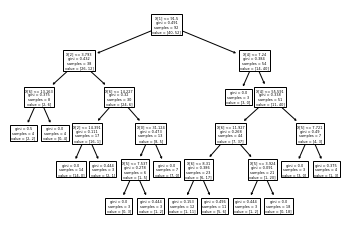

In [35]:
from sklearn import tree
tree.plot_tree(giniindex)

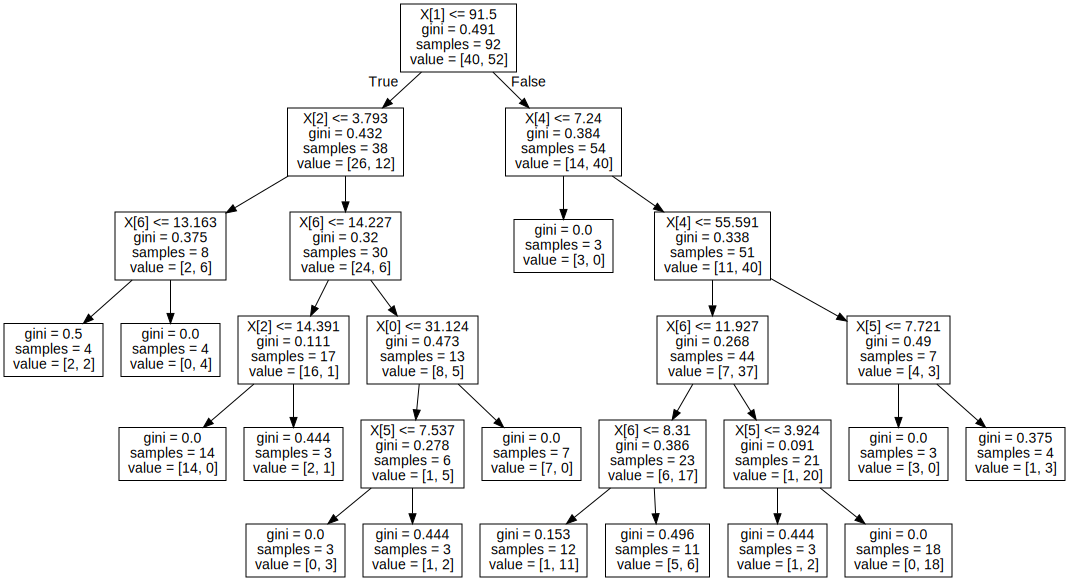

In [36]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import display

display(graphviz.Source(export_graphviz(giniindex)))

[Text(0.5769230769230769, 0.9166666666666666, 'X[1] <= 91.5\nentropy = 0.988\nsamples = 92\nvalue = [40, 52]'),
 Text(0.38461538461538464, 0.75, 'X[0] <= 31.124\nentropy = 0.9\nsamples = 38\nvalue = [26, 12]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[6] <= 13.248\nentropy = 0.991\nsamples = 27\nvalue = [15, 12]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[2] <= 3.793\nentropy = 0.672\nsamples = 17\nvalue = [14, 3]'),
 Text(0.07692307692307693, 0.25, 'entropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(0.23076923076923078, 0.25, 'X[2] <= 6.83\nentropy = 0.391\nsamples = 13\nvalue = [12, 1]'),
 Text(0.15384615384615385, 0.08333333333333333, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.3076923076923077, 0.08333333333333333, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[4] <= 28.041\nentropy = 0.469\nsamples = 10\nvalue = [1, 9]'),
 Text(0.38461538461538464, 0.25, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7]')

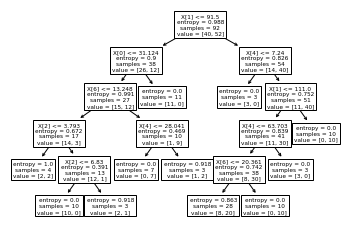

In [37]:
tree.plot_tree(entropy_deci)

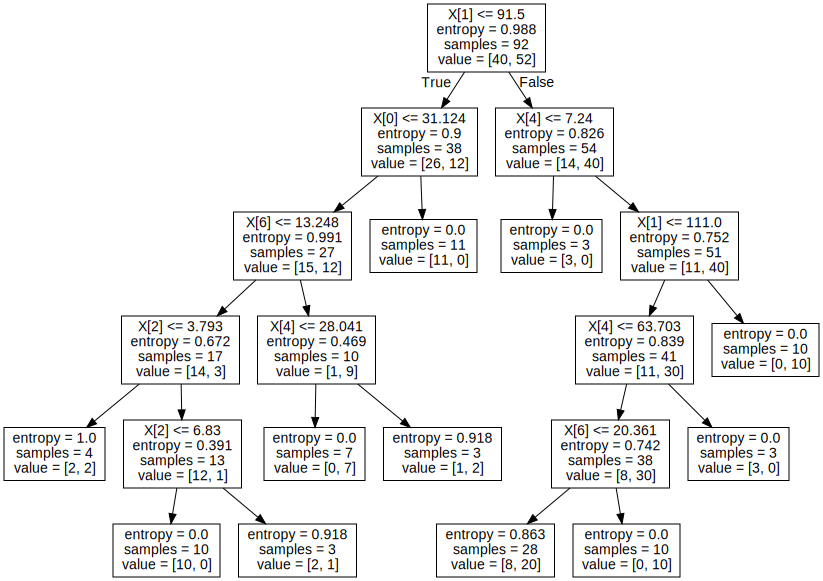

In [38]:
display(graphviz.Source(export_graphviz(entropy_deci)))